In [ ]:
from local.imports import *
from local.test import *
from local.core import *
from local.data.transform import *
from local.data.pipeline import *
from local.data.external import *
from local.data.core import *
from local.notebook.showdoc import show_doc

In [ ]:
from PIL import Image
from PIL.ImageFile import ImageFile
from torch import ByteTensor,LongTensor

In [ ]:
torch.cuda.set_device(int(os.environ.get('DEFAULT_GPU') or 0))

In [ ]:
path = untar_data(URLs.MNIST_TINY)
items = get_image_files(path)
splits = GrandparentSplitter()(items)
train,valid = (items[i] for i in splits)
train[:10],valid[:10]

([PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/8055.png'),
  PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/9466.png'),
  PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/7778.png'),
  PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/8824.png'),
  PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/8228.png'),
  PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/9620.png'),
  PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/8790.png'),
  PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/7497.png'),
  PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/7383.png'),
  PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/train/3/9324.png')],
 [PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/valid/3/957.png'),
  PosixPath('/home/sgugger/git/fastai_docs/dev/data/mnist_tiny/valid/3/9073.png'),
  Po

In [ ]:
class PILImage(): #Fix: make a subclass of something that doesnt require us to store an attribute.
    def __init__(self, img): self.img=img
    def show(self, ctx=None, **kwargs): return show_image(self.img, ctx=ctx, **kwargs)

In [ ]:
def open_img(fn:Path) -> PILImage: return Image.open(fn)

In [ ]:
class ByteTensorImage(ByteTensor): pass

In [ ]:
class Img2Tensor(Transform):
    def encodes(self, im:PILImage)->ByteTensorImage: return tensor(array(im.img))[None]
    def decodes(self, im:ByteTensorImage)->PILImage: return im 

In [ ]:
tfms = [[open_img, Img2Tensor()],
        [parent_label, Categorize()]]
datasets = TfmdDS(items, tfms)
# NB: `DataSource` is an easier way to handle this common case
train_ds,valid_ds = map(datasets.subset, splits)

In [ ]:
x,y = train_ds[3]
xd,yd = train_ds.decode_at(3)
test_eq(parent_label(train[3]),yd)
test_eq(array(Image.open(train[3])),xd.img[0])

RuntimeError: Unknown backend

In [ ]:
train_ds.show_at(3, cmap="Greys", figsize=(1,1));

RuntimeError: Unknown backend

In [ ]:
class Img2Tensor(Transform):
    def encodes(self, im:PILImage)->ByteTensor: return tensor(array(im.img))[None]
    def decodes(self, im:Tensor)->PILImage: return im 

In [ ]:
tfms = [[open_img, Img2Tensor()],
        [parent_label, Categorize()]]
datasets = TfmdDS(items, tfms)
# NB: `DataSource` is an easier way to handle this common case
train_ds,valid_ds = map(datasets.subset, splits)

In [ ]:
x,y = train_ds[3]
xd,yd = train_ds.decode_at(3)
test_eq(parent_label(train[3]),yd)
test_eq(array(Image.open(train[3])),xd.img[0])

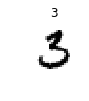

In [ ]:
train_ds.show_at(3, cmap="Greys", figsize=(1,1));